<a href="https://colab.research.google.com/github/abhiiiinair24/ML_Assignment1/blob/Testing_Logistic_Regression/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 : Classification and Regression Methods**


### **Part I: Data Analysis & Preprocessing**
#### **Step 1: Preprocessing on Penguin**

**1) Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


**2)Show head(), shape, dtypes. Analyze the dataset, e.g., return
the main statistics. Provide a brief description (2-3 sentences) of the dataset: What does it represent / key features.**

In [2]:
df = pd.read_csv('penguins.csv')
copydf = df
print('Penguins Dataset: \n',copydf.head())
print('Penguins Dataset Shape: \n',copydf.shape)
print('Penguins Dataset Type: \n',copydf.dtypes)

#print(df)
'''
Provide a brief description (2-3 sentences) of the dataset: What does it represent / key features.
Ans -> The key features in the dataset includes how we have multiple species(3)
of penguins located on multiple islands. We also have been given mutliple columns where
we are given with numerical values. We also have gender columns to distinguish between the penguins
and the year.
'''

Penguins Dataset: 
   species     island  calorie requirement  average sleep duration  \
0  Adelie  Torgersen                 6563                      11   
1  Adelie  Torgersen                 4890                      14   
2  Adelie  Torgersen                 7184                      11   
3  Adelie  Torgersen                 4169                       8   
4  Adelie  Torgersen                 4774                       8   

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0            39.1           18.7              181.0       3750.0    male   
1            39.5           17.4              186.0       3800.0  female   
2            40.3           18.0              195.0       3250.0  female   
3             NaN            NaN                NaN        992.0     NaN   
4            36.7           19.3              193.0       3450.0  female   

     year  
0  2007.0  
1  2007.0  
2  2007.0  
3  2007.0  
4  2007.0  
Penguins Dataset Shape: 
 (344, 10)


'\nProvide a brief description (2-3 sentences) of the dataset: What does it represent / key features.\nAns -> The key features in the dataset includes how we have multiple species(3)\nof penguins located on multiple islands. We also have been given mutliple columns where\nwe are given with numerical values. We also have gender columns to distinguish between the penguins\nand the year.\n'

**3)Return basic statistics using describe(). Return missing counts per column table. Which
columns have missing values or suspicious values?**

In [3]:
print('Statistics : \n',copydf.describe())

missingCountpercolumnssum = copydf.isnull().sum()
print('Missing column wise value: \n',missingCountpercolumnssum)

#We can see that the number of missing values in the columns are pretty large and hence not very ideal to drop them
#Imputing the values into the dataset with mean/median and mode.

#From the above i can see i have 3 columns with datatype as object
#Iterate over the dataset and change numerical values with mean/median and categorical values with mode().

for colTraverse in copydf.columns:
  if copydf[colTraverse].dtype == 'object':
    copydf[colTraverse].fillna(copydf[colTraverse].mode()[0],inplace=True)
  else:
    copydf[colTraverse].fillna(copydf[colTraverse].mean(),inplace=True)

#print('Updated: \n',df)

missingCountpercolumnssumupdated = copydf.isnull().sum()
print('Cross verifying null values if exists now or not: \n',missingCountpercolumnssumupdated)

Statistics : 
        calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.

/tmp/ipython-input-639187105.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copydf[colTraverse].fillna(copydf[colTraverse].mode()[0],inplace=True)
/tmp/ipython-input-639187105.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Handle mismatched string formats.
For example, in the penguins dataset, the "Species" feature might appear as "Adelie" or
"adelie," both of which refer to the same penguin species. These variations should be
standardized to a consistent format such as "Adelie" or "adelie".

In [4]:
for colTraverse in copydf.columns:
  if copydf[colTraverse].dtype == 'object':
    copydf[colTraverse] = copydf[colTraverse].astype(str).str.lower().str.strip()

#Converting all the categorical values to small case and removing the extra spaces or anything so that
#it becomes more meaningful and classifies properly.

print ('After Fixing Mismatched String formats: \n',copydf)

After Fixing Mismatched String formats: 
        species     island  calorie requirement  average sleep duration  \
0       adelie  torgersen                 6563                      11   
1       adelie  torgersen                 4890                      14   
2       adelie  torgersen                 7184                      11   
3       adelie  torgersen                 4169                       8   
4       adelie  torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  chinstrap      dream                 4826                      11   
340  chinstrap      dream                 4111                       9   
341  chinstrap      dream                 7049                      10   
342  chinstrap      dream                 4705                       7   
343  chinstrap      dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  g

Handle outliers. Detect and manage outliers within the dataset.
For example, in the penguins dataset, while flipper lengths typically fall within the range
of [180 – 210], certain entries might show values like [10-30]. These can be considered
outliers. Possible solutions:
• Remove outliers. If there are just a few outliers, you may eliminate the rows containing
these outliers.
• Impute outliers. Replace the outliers with the mean/median/mode of the feature.

In [5]:
#print(df.dtypes)

##USed in selecting both int and float values.
numericalVal = copydf.select_dtypes(include=[np.number])

#print(numericalVal)

#APply IQR

Q1 = numericalVal.quantile(0.25)
Q2 = numericalVal.quantile(0.75)
#print('25th percentile: \n',Q1)
#print('75th percentile: \n',Q2)

IQR = Q2-Q1
#print('QR: \n',IQR)

lowerThresshold = (Q1 - 1 * IQR)
upperThresshold = (Q2 + 1 * IQR)

outliers = (numericalVal < lowerThresshold) | (numericalVal > upperThresshold)
#print(outliers.count)

if outliers.any().any():  #To check the entire dataframe , .any() resulted only in columns
    print("Outliers Present.")
else:
    print("No outliers found.")

for colTraverse in numericalVal.columns:
  if outliers[colTraverse].any():
    meanval = copydf[colTraverse].mean()
    copydf.loc[outliers[colTraverse],colTraverse] = meanval

print(copydf)


Outliers Present.
       species     island  calorie requirement  average sleep duration  \
0       adelie  torgersen                 6563                      11   
1       adelie  torgersen                 4890                      14   
2       adelie  torgersen                 7184                      11   
3       adelie  torgersen                 4169                       8   
4       adelie  torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  chinstrap      dream                 4826                      11   
340  chinstrap      dream                 4111                       9   
341  chinstrap      dream                 7049                      10   
342  chinstrap      dream                 4705                       7   
343  chinstrap      dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0         39.10

#### **7. Using any data visualization library (e.g. matplotlib, seaborn, plotly), provide at least 5**
visualization graphs related to your dataset. You can utilize any columns or a combination
of columns in your dataset to generate graphs. E.g. correlation matrix, features vs. the
target, counts of categorical features vs. the target.

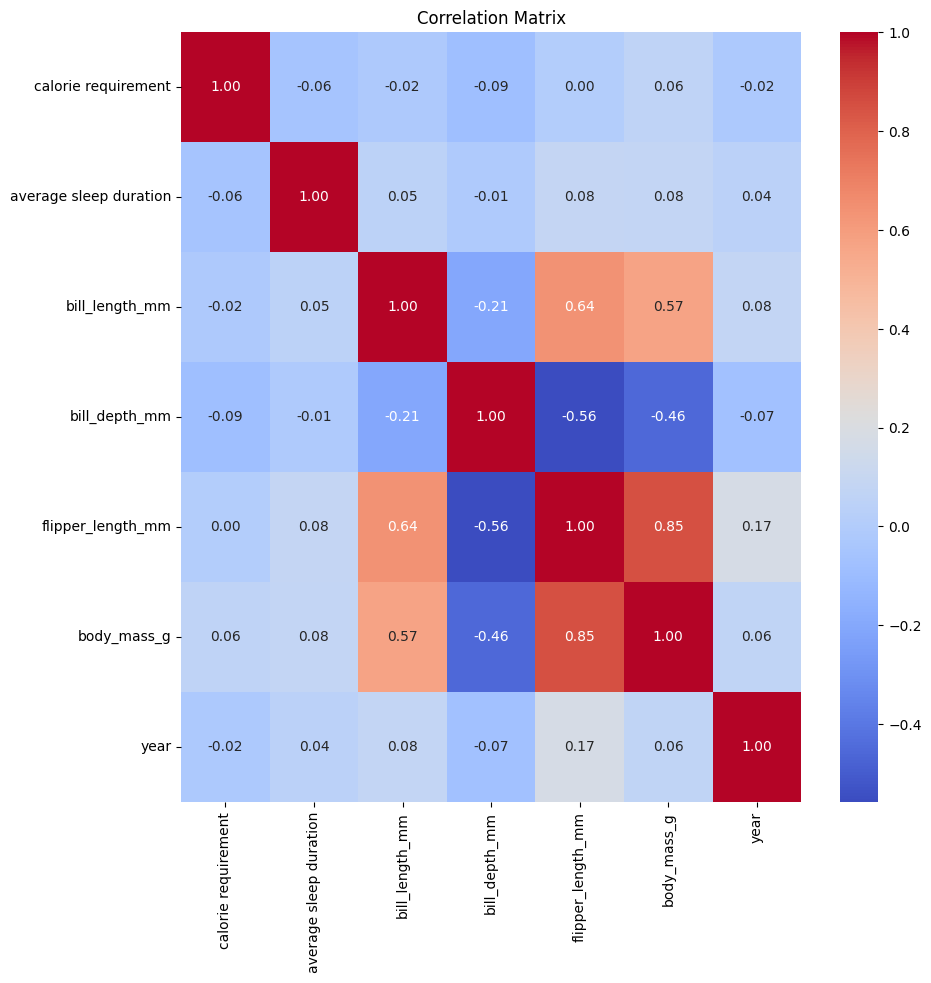

In [6]:
# 7. Data Visualization
# Used matplotlib.pyplot as plt to plot heatmap

# Selecting columns which in in int of float which can be represented in heatmap
numerical_df = copydf.select_dtypes(include=['int64', 'float64'])

# Ploting Graph
plt.figure(figsize=(10,10))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


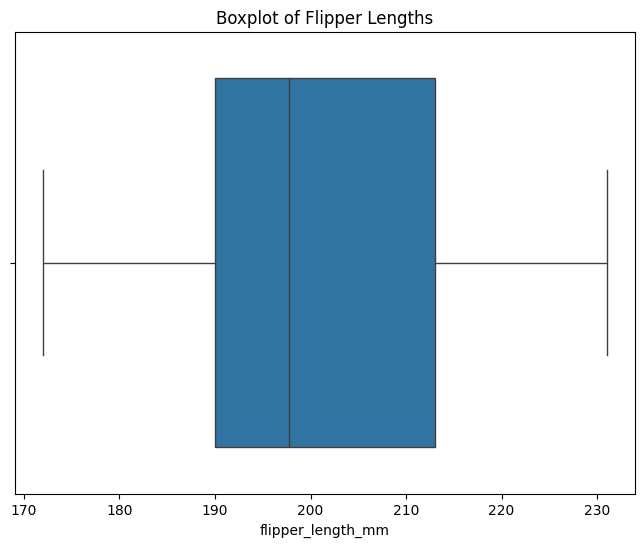

In [7]:
# Used matplotlib.pyplot as plt to plot boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x=copydf["flipper_length_mm"])
plt.title("Boxplot of Flipper Lengths")
plt.show()


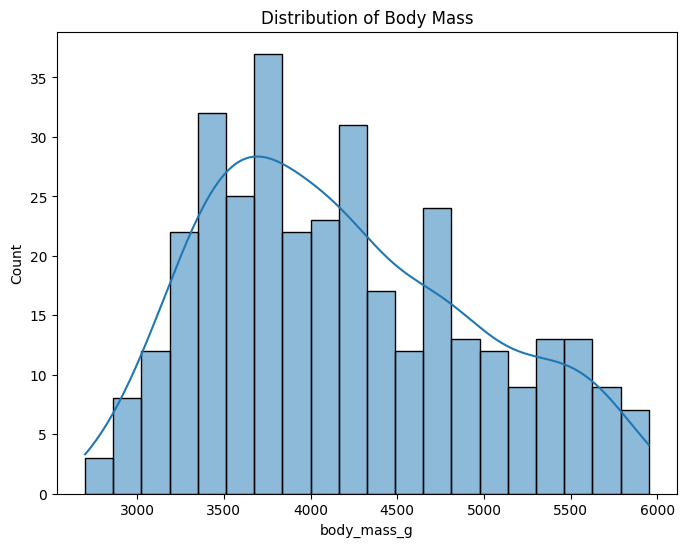

In [8]:
# Used matplotlib.pyplot as plt to plot histplot

plt.figure(figsize=(8, 6))
# for Line we have used Kernel Density Estimation
sns.histplot(df["body_mass_g"], kde=True, bins=20)
plt.title("Distribution of Body Mass")
plt.show()


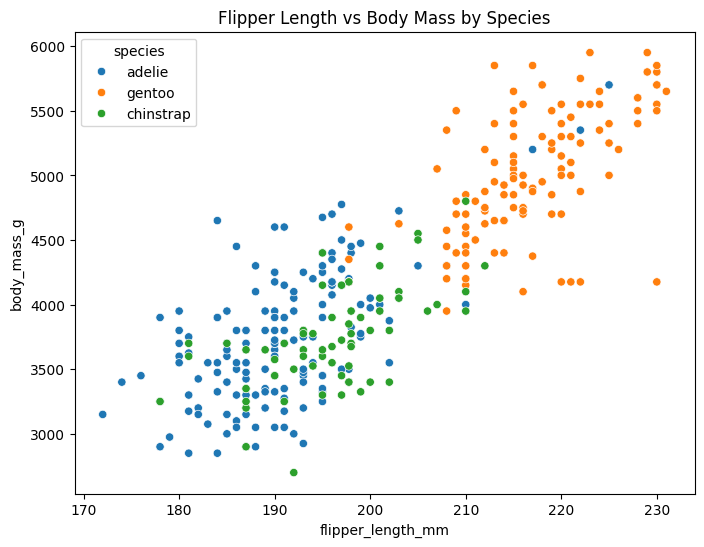

In [9]:
# Used matplotlib.pyplot as plt to plot histplot

plt.figure(figsize=(8, 6))
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=copydf)
plt.title("Flipper Length vs Body Mass by Species")
plt.show()


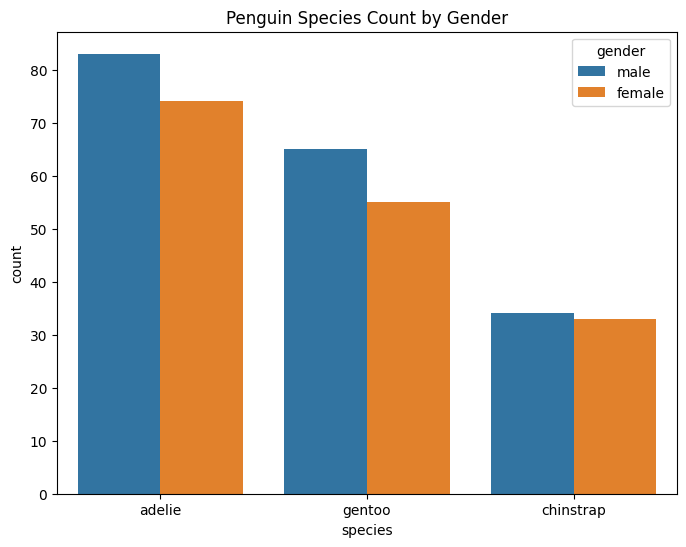

In [10]:
# Used matplotlib.pyplot as plt to plot countplot

plt.figure(figsize=(8, 6))
sns.countplot(x="species", hue="gender", data=copydf)
plt.title("Penguin Species Count by Gender")
plt.show()


In [11]:
# 8. Identify uncorrelated or unrelated features

# Used Gender column and created new column with values 0 and 1 which would be helpfull to find correlation in data.
copydf["gender_encode"] = copydf["gender"].map({"male": 0, "female": 1})
numerical_df["gender_encode"] = copydf["gender"].map({"male": 0, "female": 1})

# using corr() to calculate the correlation matrix of a DataFrame.
corr_matrix = numerical_df.corr()
print(corr_matrix["gender_encode"].sort_values(ascending=False))

gender_encode             1.000000
year                      0.016833
calorie requirement       0.013366
average sleep duration   -0.045104
flipper_length_mm        -0.247552
bill_length_mm           -0.328480
bill_depth_mm            -0.352421
body_mass_g              -0.395747
Name: gender_encode, dtype: float64


In [12]:
# Calculating features with low correlation and removing them/
low_corr_features = corr_matrix["gender_encode"].abs()[corr_matrix["gender_encode"].abs() < 0.05].index
new_df = copydf.drop(columns=low_corr_features)

print("Dropped features:", list(low_corr_features))
new_df.head()

Dropped features: ['calorie requirement', 'average sleep duration', 'year']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,gender_encode
0,adelie,torgersen,39.100000,18.700000,181.000000,3750.000000,male,0
1,adelie,torgersen,39.500000,17.400000,186.000000,3800.000000,female,1
2,adelie,torgersen,40.300000,18.000000,195.000000,3250.000000,female,1
3,adelie,torgersen,45.494214,18.018318,197.764881,4175.463127,male,0
4,adelie,torgersen,36.700000,19.300000,193.000000,3450.000000,female,1


In [13]:
# 9. Convert features with string datatype to categorical
# One-hot encoding
one_hot_encoded_df = pd.get_dummies(new_df, columns=["species", "island"], dtype=int)
one_hot_encoded_df.head()

# for Label encoding we did that on gender above
# df["gender_encode"] = df["gender"].map({"male": 0, "female": 1})
# numerical_df["gender_encode"] = df["gender"].map({"male": 0, "female": 1})
one_hot_encoded_df.drop(columns=["gender"], inplace=True)
one_hot_encoded_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_encode,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_torgersen
0,39.100000,18.700000,181.000000,3750.000000,0,1,0,0,0,0,1
1,39.500000,17.400000,186.000000,3800.000000,1,1,0,0,0,0,1
2,40.300000,18.000000,195.000000,3250.000000,1,1,0,0,0,0,1
3,45.494214,18.018318,197.764881,4175.463127,0,1,0,0,0,0,1
4,36.700000,19.300000,193.000000,3450.000000,1,1,0,0,0,0,1


In [14]:
# 10. Normalize non-categorical features
# Normalizing that features like [bill_depth_mm,flipper_length_mm, body_mass_g]
normalize_df = one_hot_encoded_df.copy()
for col in ["bill_depth_mm","flipper_length_mm", "body_mass_g"]:
    normalize_df[col] = (normalize_df[col] - normalize_df[col].min()) / normalize_df[col].max() - normalize_df[col].min()
normalize_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_encode,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_torgersen
0,39.100000,-12.839535,-171.961039,-2699.823529,0,1,0,0,0,0,1
1,39.500000,-12.900000,-171.939394,-2699.815126,1,1,0,0,0,0,1
2,40.300000,-12.872093,-171.900433,-2699.907563,1,1,0,0,0,0,1
3,45.494214,-12.871241,-171.888464,-2699.752023,0,1,0,0,0,0,1
4,36.700000,-12.811628,-171.909091,-2699.873950,1,1,0,0,0,0,1


#### **Step 2: Refactor into a Reusable Preprocessing Method**

#### **1. Create a reusable structure:**
**This can be a class (e.g., PreprocessPipeline) or a clean set of functions.
• Your code should include:
o Handling missing values
o Cleaning string formats
o Outlier detection and treatment
o Encoding categorical variables
o Scaling numeric features**

In [15]:
class PreprocessPipeline:
  def getfileForProcessing():
    None
  def importLibraries(self):
    return None
  def handleMissingValues(self,copydf):
    return None
  def handleStringValues(self,df):
    return None
  def handleOutliers(self,df):
    return None
  def funcHotEncoding(self, df,targetColumn):
    return None
  def scalingValues(self,df):
    return None
  def fit_transform(self,df):
    return None

In [16]:
#Print test

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class PreprocessPipeline:
    def __init__(self, path="penguins.csv", one_hot_cols=None, label_encode_cols=None):
        # Initialize the values that would be needed in other funtions so we dont have to send the value again and again while calling the function
        self.path = path
        self.df = None
        self.scaled_df = None
        self.settings = {}
        self.one_hot_cols = one_hot_cols if one_hot_cols else ["species", "island"]
        self.label_encode_cols = label_encode_cols if label_encode_cols else ["gender"]

    def load_data(self):
        self.df = pd.read_csv(self.path)
        self.settings["loaded"] = f"Data loaded from {self.path} with shape {self.df.shape}"
        return self.df

    def handle_missing(self):
        self.df = self.df.dropna(thresh=len(self.df.columns)//2)
        for col in self.df.select_dtypes(include=["object"]).columns:
            self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
        for col in self.df.select_dtypes(include=["int64","float64"]).columns:
            self.df[col] = self.df[col].fillna(self.df[col].median())
        self.settings["missing"] = "Dropped rows with >50% missing, filled categorical with mode, numeric with median"

    def clean_strings(self):
        for col in self.df.select_dtypes(include=["object"]).columns:
            self.df[col] = self.df[col].astype(str).str.strip().str.lower()
        self.settings["string_clean"] = "Stripped and lowercased strings"

    def handle_outliers(self):
        for col in self.df.select_dtypes(include=["int64","float64"]).columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower, upper = Q1 - 1*IQR, Q3 + 1*IQR
            self.df[col] = np.where(self.df[col] < lower, self.df[col].mean(), self.df[col])
            self.df[col] = np.where(self.df[col] > upper, self.df[col].mean(), self.df[col])
        self.settings["outliers"] = "Outliers capped with mean using 1*IQR"

    def encode_categoricals(self):
        if "gender" in self.df.columns:
            self.df["gender_encode"] = self.df["gender"].map({"male": 0, "female": 1})
        for col in self.one_hot_cols:
            if col in self.df.columns:
                encoded = pd.get_dummies(self.df[col], prefix=col, drop_first=True, dtype=int)
                self.df.drop(columns=[col], inplace=True)
                self.df = pd.concat([self.df, encoded], axis=1)
        for col in self.label_encode_cols:
            if col in self.df.columns and col != "gender":
                self.df[col + "_encoded"] = self.df[col].astype("category").cat.codes
                self.df.drop(columns=[col], inplace=True)
        self.settings["encoding"] = f"Label encoded: {self.label_encode_cols}, One-hot encoded: {self.one_hot_cols}"

    def scale_numeric(self):
        # Only scale numeric columns if they exist in the dataset
        num_cols = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
        self.scaled_df = self.df.copy()
        existing_cols = [col for col in num_cols if col in self.scaled_df.columns]
        for col in existing_cols:
            min_val = self.scaled_df[col].min()
            max_val = self.scaled_df[col].max()
            self.scaled_df[col] = (self.scaled_df[col] - min_val) / (max_val - min_val)
        self.settings["scaling"] = {col:(self.scaled_df[col].min(), self.scaled_df[col].max()) for col in existing_cols}

    def fit_transform(self):
        self.load_data()
        self.handle_missing()
        self.clean_strings()
        self.handle_outliers()
        self.encode_categoricals()
        self.scale_numeric()
        return self.scaled_df

    def visualizeData(self):
        numeric_df = self.scaled_df.select_dtypes(include=["float64","int64"])
        if numeric_df.shape[1] > 0:
            plt.figure(figsize=(10,6))
            sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
            plt.title("Correlation Heatmap")
            plt.show()

            numeric_df.hist(figsize=(12,10))
            plt.suptitle("Histograms for Numeric Features", y=1.02)
            plt.show()

            for col in numeric_df.columns[:3]:
                plt.figure(figsize=(6,4))
                sns.boxplot(x=numeric_df[col])
                plt.title(f"Boxplot of {col}")
                plt.show()

            if numeric_df.shape[1] >= 3:
                sns.pairplot(numeric_df.iloc[:, :3])
                plt.suptitle("Pairplot of 3 Numeric Features", y=1.02)
                plt.show()

            for col in numeric_df.columns[:3]:
                plt.figure(figsize=(6,4))
                sns.violinplot(x=numeric_df[col])
                plt.title(f"Violin Plot of {col}")
                plt.show()

        print("Settings Summary:\n", self.settings)



Cleaned dataset preview (first 5 rows):
    calorie requirement  average sleep duration  bill_length_mm  bill_depth_mm  \
0               6563.0                    11.0        0.270270       0.666667   
1               4890.0                    14.0        0.285714       0.511905   
2               7184.0                    11.0        0.316602       0.583333   
3               4169.0                     8.0        0.501931       0.500000   
4               4774.0                     8.0        0.177606       0.738095   

   flipper_length_mm  body_mass_g  gender    year  gender_encode  \
0           0.152542     0.323077    male  2007.0              0   
1           0.237288     0.338462  female  2007.0              1   
2           0.389831     0.169231  female  2007.0              1   
3           0.423729     0.453428    male  2007.0              0   
4           0.355932     0.230769  female  2007.0              1   

   species_chinstrap  species_gentoo  island_dream  island_tor

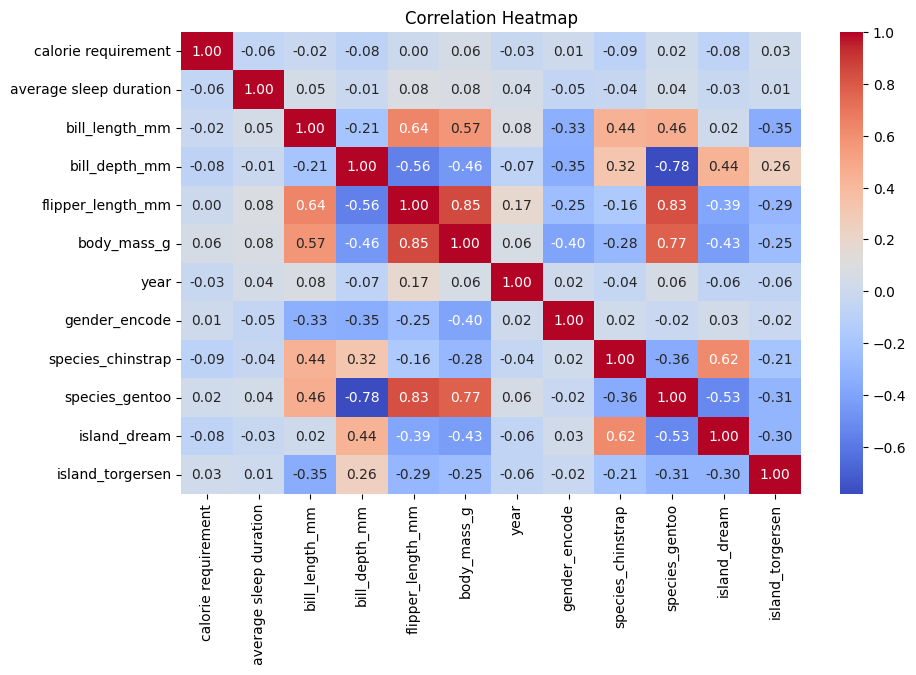

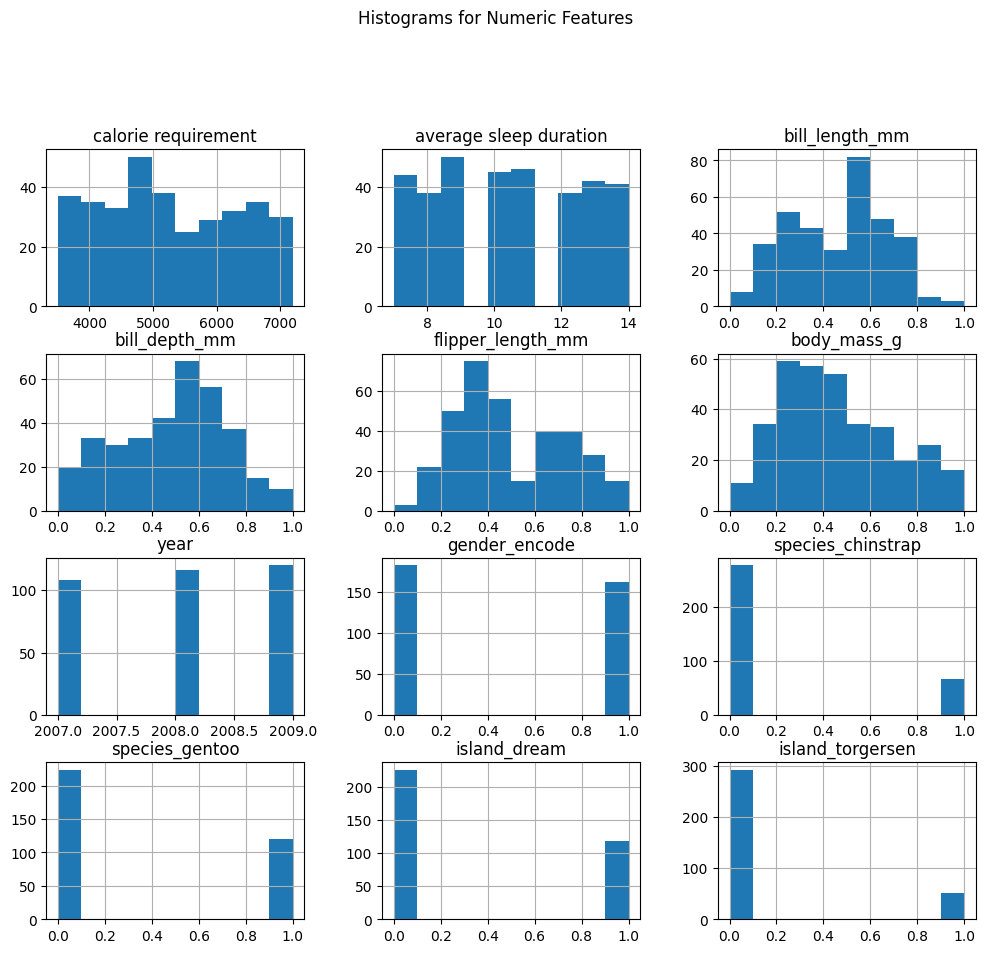

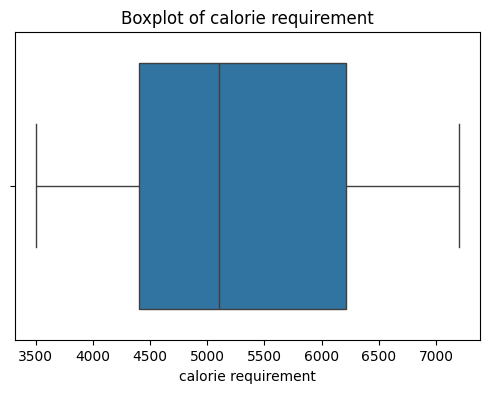

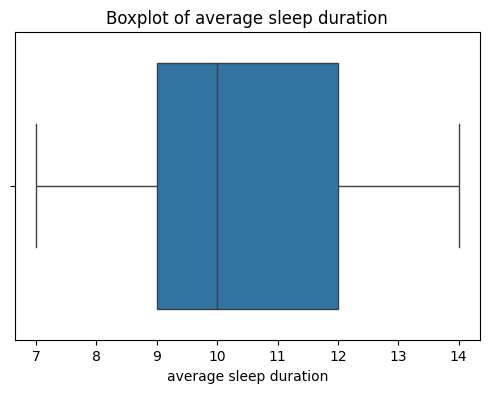

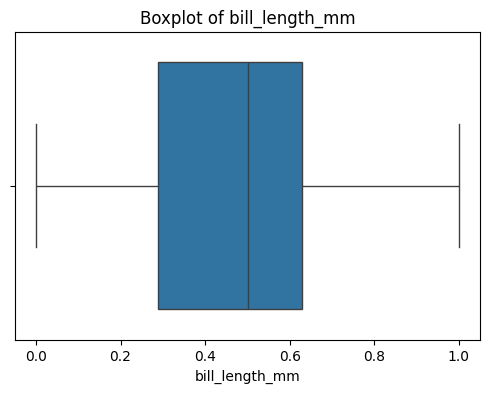

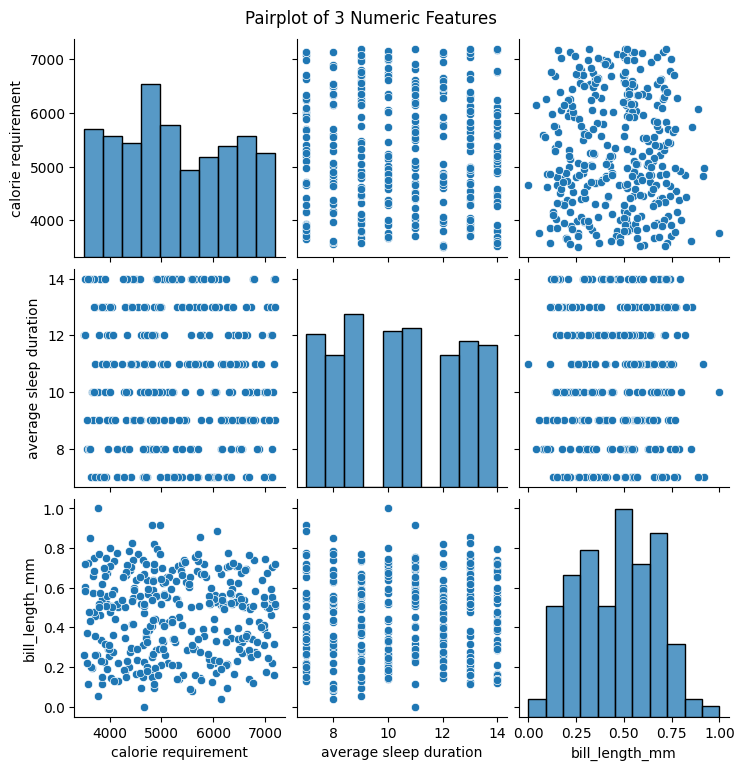

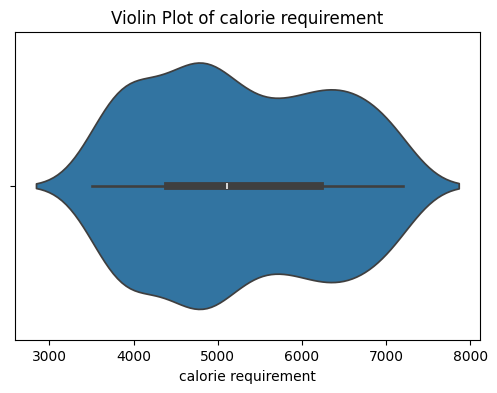

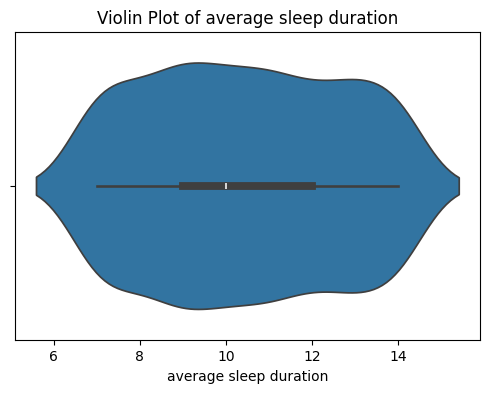

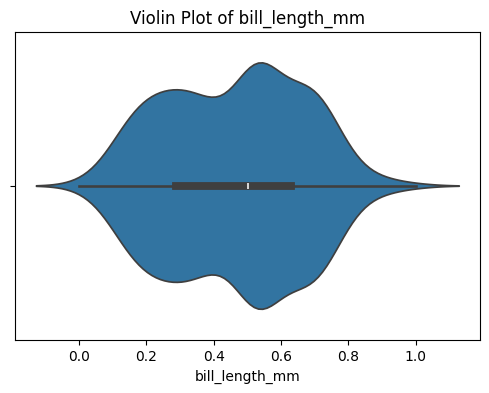

Settings Summary:
 {'loaded': 'Data loaded from penguins.csv with shape (344, 10)', 'missing': 'Dropped rows with >50% missing, filled categorical with mode, numeric with median', 'string_clean': 'Stripped and lowercased strings', 'outliers': 'Outliers capped with mean using 1*IQR', 'encoding': "Label encoded: ['gender'], One-hot encoded: ['species', 'island']", 'scaling': {'bill_length_mm': (0.0, 1.0), 'bill_depth_mm': (0.0, 1.0), 'flipper_length_mm': (0.0, 1.0), 'body_mass_g': (0.0, 1.0)}}


In [32]:
# For Penguins
Mypipeline = PreprocessPipeline(path="penguins.csv", label_encode_cols=["gender"])
cleaned_df = Mypipeline.fit_transform()
print("\nCleaned dataset preview (first 5 rows):\n", cleaned_df.head())
print("Columns in cleaned dataset:\n", cleaned_df.columns.tolist())
Mypipeline.visualizeData()
cleaned_df.to_csv("penguins_preprocessed.csv", index=False)

# For Diamond
# Mypipeline = PreprocessPipeline(path="diamond.csv", label_encode_cols=["cut"])
# cleaned_df = Mypipeline.fit_transform()
# print("\nCleaned dataset preview (first 5 rows):\n", cleaned_df.head())
# print("Columns in cleaned dataset:\n", cleaned_df.columns.tolist())
# Mypipeline.visualizeData()
# cleaned_df.to_csv("diamond_preprocessed.csv", index=False)

# For Emission by country
# Mypipeline = PreprocessPipeline(path="emissions_by_country.csv", label_encode_cols=["cut"])
# cleaned_df = Mypipeline.fit_transform()
# print("\nCleaned dataset preview (first 5 rows):\n", cleaned_df.head())
# print("Columns in cleaned dataset:\n", cleaned_df.columns.tolist())
# Mypipeline.visualizeData()
# cleaned_df.to_csv("emissions_by_country_preprocessed.csv", index=False)


Ans: Print a short summary:
• Which missingness strategy you used.
We have a kept a threshold value , and if the missing value is below the thresshold count, then we are dropping that rows
• How you handled outliers.
Outliers were handled by IQR which gave us the perfect mechanism to find the 50th percentile of the data
• Which columns were encoded.
Gender
• Which numeric features were scaled.
-  One hot encoded included two categorical values excluding the target column which ie [speices, island]

In [21]:
# normalize_df = cleaned_df.copy()
# normalize_df.head()


     calorie requirement  average sleep duration  bill_length_mm  \
0                 6563.0                    11.0        0.270270   
1                 4890.0                    14.0        0.285714   
2                 7184.0                    11.0        0.316602   
3                 4169.0                     8.0        0.501931   
4                 4774.0                     8.0        0.177606   
..                   ...                     ...             ...   
339               4826.0                    11.0        0.915058   
340               4111.0                     9.0        0.440154   
341               7049.0                    10.0        0.675676   
342               4705.0                     7.0        0.722008   
343               6098.0                     7.0        0.698842   

     bill_depth_mm  flipper_length_mm  body_mass_g  gender    year  \
0         0.666667           0.152542     0.323077    male  2007.0   
1         0.511905           0.237288     0

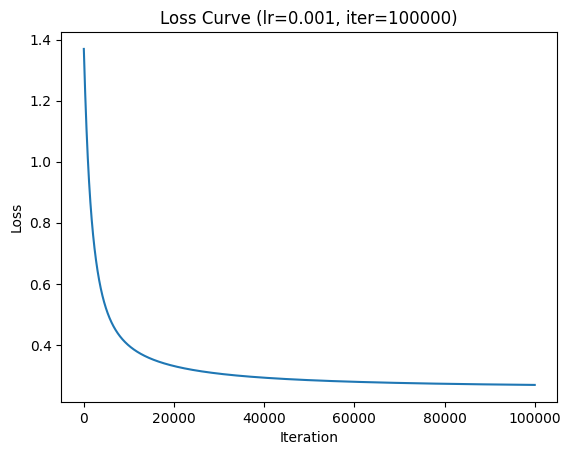


Training with learning_rate=0.005, iterations=50000
Iteration 0, Loss: 1.246675
Iteration 10000, Loss: 0.281576
Iteration 20000, Loss: 0.267814
Iteration 30000, Loss: 0.264056
Iteration 40000, Loss: 0.262639
Confusion Matrix:
TP: 27, FP: 6
FN: 7, TN: 29
Accuracy: 0.8116, Precision: 0.8182, Recall: 0.7941, F1: 0.8060


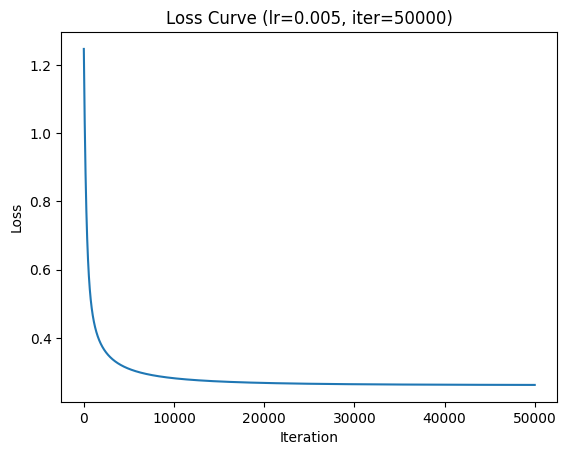


Training with learning_rate=0.01, iterations=20000
Iteration 0, Loss: 1.215459
Iteration 10000, Loss: 0.269067
Confusion Matrix:
TP: 27, FP: 6
FN: 7, TN: 29
Accuracy: 0.8116, Precision: 0.8182, Recall: 0.7941, F1: 0.8060


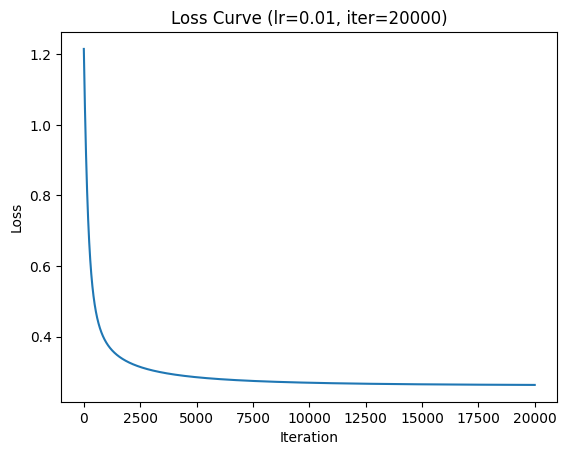

Best model accuracy: 0.8116


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

class LogitRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, weights=None, bias=0):
        self.learning_rate = learning_rate
        self.num_iterations = iterations
        self.weights = weights
        self.bias = bias
        self.loss = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def cost(self, X, y):
        N = X.shape[0]
        pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        pred = np.clip(pred, 1e-10, 1-1e-10)
        loss = (-1/N) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        return loss

    def gradient_descent(self, X, y):
        N = X.shape[0]
        pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        delta = pred - y
        dW = np.dot(X.T, delta) / N
        db = np.sum(delta) / N
        self.weights -= self.learning_rate * dW
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.values
        y = y.reshape(-1, 1)

        # Initialize weights randomly in [0,1]
        if self.weights is None:
            self.weights = np.random.uniform(0, 1, (X.shape[1], 1))

        # Gradient Descent loop
        for i in range(self.num_iterations):
            self.gradient_descent(X, y)
            loss_val = self.cost(X, y)
            self.loss.append(loss_val)
            if i % 10000 == 0:
                print(f"Iteration {i}, Loss: {loss_val:.6f}")

    def predict(self, X):
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        y_prob = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return (y_prob >= 0.5).astype(int)


def standardize_features(X):
    return (X - X.mean()) / X.std()


def evaluate_performance(y_true, y_pred):
    TP = np.sum((y_true==1) & (y_pred==1))
    TN = np.sum((y_true==0) & (y_pred==0))
    FP = np.sum((y_true==0) & (y_pred==1))
    FN = np.sum((y_true==1) & (y_pred==0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    print("Confusion Matrix:")
    print(f"TP: {TP}, FP: {FP}")
    print(f"FN: {FN}, TN: {TN}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    return accuracy, precision, recall, f1


# normalize_df is your dataset
cleaned_df.head()
cleaned_df["gender_encode"] = cleaned_df["gender_encode"].astype(int)
normalize_df = cleaned_df.copy()
normalize_df.head()

X = normalize_df.drop(columns=["gender_encode"])
X_numeric = X.select_dtypes(include=[np.number])
print(X)
Y = normalize_df["gender_encode"]

X_scaled = standardize_features(X_numeric)

# Shuffle and split
rows = X_scaled.shape[0]
indices = np.arange(rows)
np.random.shuffle(indices)
split_size = int(0.8 * rows)

train_idx = indices[:split_size]
test_idx = indices[split_size:]

X_train = X_scaled.iloc[train_idx]
y_train = Y.iloc[train_idx]
X_test = X_scaled.iloc[test_idx]
y_test = Y.iloc[test_idx]

hyperparams = [
    {"learning_rate": 1e-3, "iterations": 100000},
    {"learning_rate": 5e-3, "iterations": 50000},
    {"learning_rate": 1e-2, "iterations": 20000},
]

best_accuracy = 0
best_model = None

for hp in hyperparams:
    print(f"\nTraining with learning_rate={hp['learning_rate']}, iterations={hp['iterations']}")
    model = LogitRegression(learning_rate=hp['learning_rate'], iterations=hp['iterations'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1 = evaluate_performance(y_test.values.flatten(), y_pred.flatten())

    # Plot loss curve
    plt.figure()
    plt.plot(model.loss)
    plt.title(f"Loss Curve (lr={hp['learning_rate']}, iter={hp['iterations']})")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

with open("best_model_weights.pkl", "wb") as f:
    pickle.dump(best_model.weights, f)

print(f"Best model accuracy: {best_accuracy:.4f}")

Refences:
[numpy.correlation matrix](https://numpy.org/doc/2.1/reference/generated/numpy.correlate.html)

[IQR logic](https://www.geeksforgeeks.org/numpy/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/)

[Logistic Regression](https://realpython.com/logistic-regression-python/)

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html)

[MatplotLib](https://matplotlib.org/stable/index.html)

[Logistic Regression](https://realpython.com/logistic-regression-python/)

[Logistic Regression](https://realpython.com/logistic-regression-python/)

[Logistic Regression](https://realpython.com/logistic-regression-python/)

[Logistic Regression](https://realpython.com/logistic-regression-python/)


